In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [176]:
estaciones = pd.read_excel('data/Estaciones.xlsx', sheet_name='Anuales')
estaciones

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Año hid,San Luis,Miraflores,Pozo Sarmiento,Pie de Medano,Valle Viejo,Caimancito,Casa de Piedra,Potrero del Clavillo,Piedra Grande,Los Sosa,Padilla,La Maria,San Luis Tucuman
1,1946,NaN,NaN,745.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1947,NaN,NaN,667.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1948,NaN,NaN,557.3,NaN,NaN,487.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1949,NaN,NaN,617.7,NaN,NaN,632.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2001,NaN,NaN,1065,NaN,492.8,1236.7,2865.5,1503.5,2413.5,2783.5,1793.4,801.6,1334
57,2002,NaN,NaN,1105.9,NaN,631,901.1,2126,940.5,1910.5,2266.3,1503.2,811.1,938
58,2003,NaN,NaN,1144.2,NaN,421.5,1303.9,2491.9,1074,1724.5,2274.6,1289.2,858.2,849
59,2004,NaN,NaN,1204.1,NaN,311.3,793.9,2161.8,879,1501,1676.9,1155.6,561.8,825


In [177]:
# Pongo en las columnas las estaciones.
estaciones.fillna(0, inplace=True)
estaciones.columns = list(estaciones.loc[0])
estaciones.rename(columns={'Año hid':'anio'}, inplace=True)
estaciones = estaciones.loc[1:]

# Pongo los anios en el indice.
estaciones.set_index('anio', inplace=True)
estaciones = estaciones.astype('float')
estaciones

,San Luis,Miraflores,Pozo Sarmiento,Pie de Medano,Valle Viejo,Caimancito,Casa de Piedra,Potrero del Clavillo,Piedra Grande,Los Sosa,Padilla,La Maria,San Luis Tucuman
anio,,,,,,,,,,,,,
1946,0.0,0.0,745.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1947,0.0,0.0,667.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1948,0.0,0.0,557.3,0.0,0.0,487.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1949,0.0,0.0,617.7,0.0,0.0,632.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1950,0.0,0.0,821.7,0.0,0.0,1236.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1951,0.0,0.0,469.1,0.0,0.0,737.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,0.0,805.7,860.1,0.0,0.0,1239.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1953,810.4,670.1,504.7,0.0,0.0,623.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1954,1117.2,629.0,833.1,0.0,0.0,925.2,0.0,727.8,0.0,1718.0,0.0,0.0,0.0


In [178]:
estacionesINFO = pd.read_excel('data/Estaciones.xlsx', sheet_name='INFO')
datosINFO = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='INFO')
datosINFO.rename(columns={'LATITUD (°S)':'latitud','LONGITUD (°W)':'longitud'}, inplace=True)
datosINFO

,INDICATIVO,latitud,longitud
0,V1,30.0,60.0
1,V2,30.0,62.5
2,V3,30.0,65.0
3,V4,30.0,67.5
4,V5,30.0,70.0
5,V6,27.5,60.0
6,V7,27.5,62.5
7,V8,27.5,65.0
8,V9,27.5,67.5
9,V10,27.5,70.0


In [179]:
estacionesINFO['latitud'] =  estacionesINFO['LAT (S), LONG (W)(º)'].map(lambda x: float(str(x).split(',')[0]))
estacionesINFO['longitud'] = estacionesINFO['LAT (S), LONG (W)(º)'].map(lambda x: float(str(x).split(',')[1].strip()))
estacionesINFO.drop('LAT (S), LONG (W)(º)', axis=1, inplace=True)
estacionesINFO

,Estacion,Provincia,Organismo,inicio,fin,latitud,longitud
0,San Luis,Salta,SRHN,1953,1999,26.06,66.00
1,Miraflores,Salta,SRHN,1952,1986,25.36,64.82
2,Pozo Sarmiento,Salta,SRHN,1946,2019,23.21,64.20
3,Pie de Medano,Catamarca,SRHN,1971,2019,26.98,66.22
4,Valle Viejo,Catamarca,INTA,1959,2007,28.48,65.73
5,Caimancito,Jujuy,SRHN,1948,2019,23.70,64.53
6,Casa de Piedra,Tucuman,SRHN,1989,2019,27.27,65.90
7,Potrero del Clavillo,Tucuman,SRHN,1954,2019,27.40,65.97
8,Piedra Grande,Tucuman,SRHN,1989,2019,27.30,65.90
9,Los Sosa,Tucuman,SRHN,1954,2019,27.10,65.63


In [180]:
# Calculo cual es el INDICATIVO mas cercano a cada estacion
# y lo guardo en indicativos_mas_cercanos.
coor_estaciones = list(zip(estacionesINFO.latitud, estacionesINFO.longitud))
coor_datos = list(zip(datosINFO.latitud, datosINFO.longitud))

indicativos_mas_cercanos = []

for x in coor_estaciones:
    v_mas_cercano = ''
    dist = math.inf
    for y in coor_datos:
        distancia = math.dist(x, y)
        if distancia < dist:
            tmp = datosINFO[datosINFO.latitud == y[0]]
            v_mas_cercano = tmp[datosINFO.longitud == y[1]].INDICATIVO.iloc[0]
            dist = distancia
    indicativos_mas_cercanos.append(vx)

estacionesINFO['mas_cercano'] = pd.Series(indicativos_mas_cercanos)
estacionesINFO

/tmp/ipykernel_668/2257791714.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  vx = tmp[datosINFO.longitud == y[1]].INDICATIVO.iloc[0]


,Estacion,Provincia,Organismo,inicio,fin,latitud,longitud,mas_cercano
0,San Luis,Salta,SRHN,1953,1999,26.06,66.00,V13
1,Miraflores,Salta,SRHN,1952,1986,25.36,64.82,V13
2,Pozo Sarmiento,Salta,SRHN,1946,2019,23.21,64.20,V18
3,Pie de Medano,Catamarca,SRHN,1971,2019,26.98,66.22,V8
4,Valle Viejo,Catamarca,INTA,1959,2007,28.48,65.73,V8
5,Caimancito,Jujuy,SRHN,1948,2019,23.70,64.53,V18
6,Casa de Piedra,Tucuman,SRHN,1989,2019,27.27,65.90,V8
7,Potrero del Clavillo,Tucuman,SRHN,1954,2019,27.40,65.97,V8
8,Piedra Grande,Tucuman,SRHN,1989,2019,27.30,65.90,V8
9,Los Sosa,Tucuman,SRHN,1954,2019,27.10,65.63,V8


In [181]:
datos = pd.read_excel('data/datos NCEP NCAR.xlsx', sheet_name='Total').set_index('año')
datos = datos[['V8','V13','V18']]
datos

,V8,V13,V18
año,,,
1949,1124.273531,1399.143676,1405.608588
1950,1422.157281,1935.129700,2815.072889
1951,1026.295511,1230.464564,2180.920342
1952,1438.206289,1621.667093,2763.782849
1953,1437.531299,1910.917400,2872.739886
...,...,...,...
2005,302.898161,679.006402,1767.074644
2006,347.494667,838.392093,1692.622746
2007,373.843994,956.051851,1985.011453


Text(458.8027777777778, 0.5, 'Año')

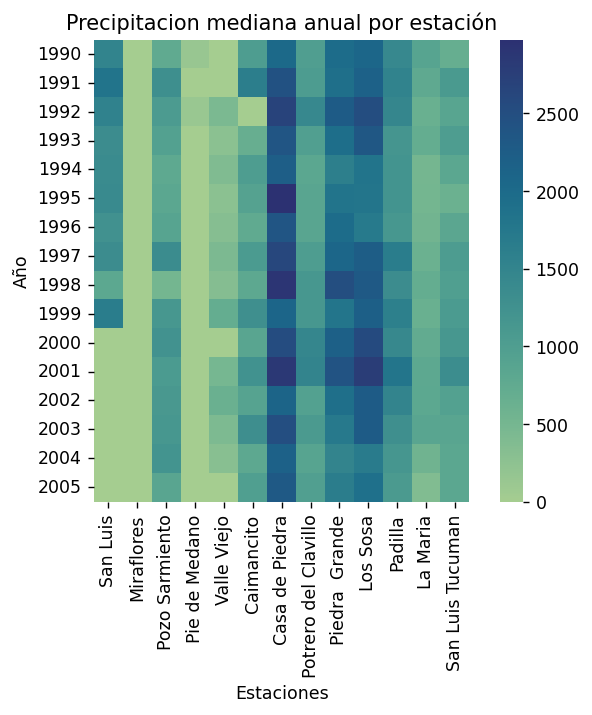

In [182]:
plt.figure(dpi=125)
sns.heatmap(estaciones, square=True, yticklabels=True, cmap="crest")
# Achico los datos porque quedaba ilegible.
# Ademas no hay muchas medidas en años anteriores.
plt.ylim(top=44)
plt.title('Precipitacion mediana anual por estación')
plt.xlabel('Estaciones')
plt.ylabel('Año')

# Hay que comparar cada estacion a su indicativo mas cercano

- V8  = ['Pie de Medano', 'Valle Viejo', 'Casa de Piedra', 'Potrero del Clavillo', 'Piedra Grande', 'Los Sosa', 'Padilla', 'La Maria', 'San Luis Tucuman']
- V13 = ['San Luis', 'Mira Flores']
- V18 = ['Pozo Sarmiento', 'Caimancito']

Text(536.181466302368, 0.5, 'Año')

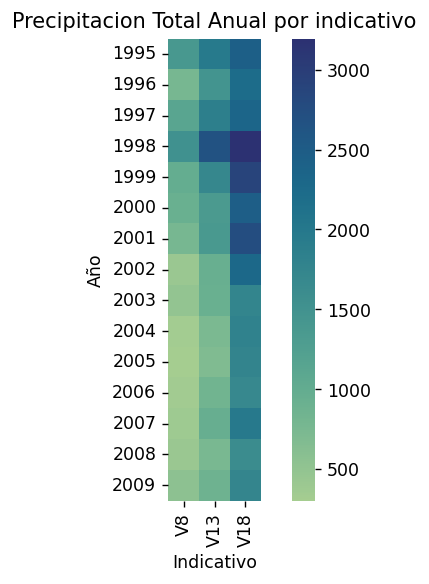

In [183]:
plt.figure(dpi=125)
sns.heatmap(datos, square=True, yticklabels=True, cmap="crest")
plt.ylim(top=46)
plt.title('Precipitacion Total Anual por indicativo')
plt.xlabel('Indicativo')
plt.ylabel('Año')